
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  

AttributeError: _ARRAY_API not found


--- Random Forest Evaluation ---
Accuracy: 0.92
Precision: 0.93
Recall: 0.86
F1 Score: 0.89
ROC AUC: 0.95


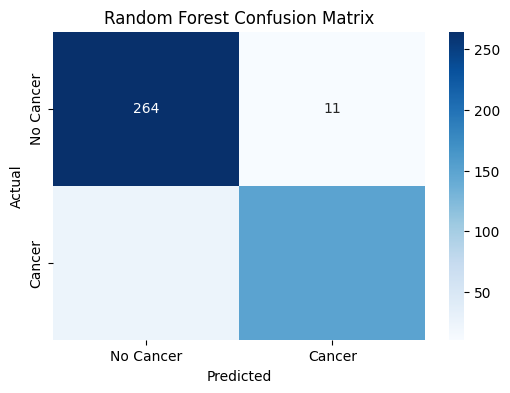

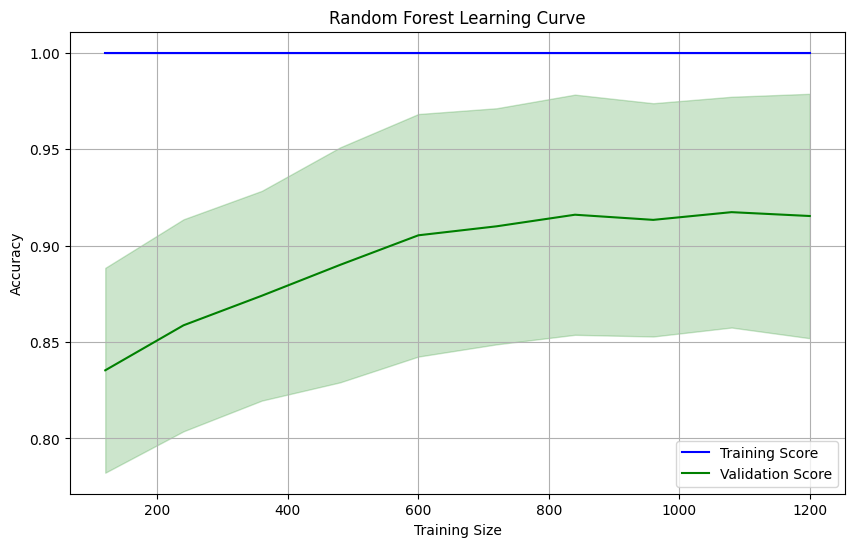

How many patients do you want to test? 2
✅ Model exported as cancer_model.pkl

--- Patient 1 ---
Age: 24
Gender (0 for Male, 1 for Female): 1
BMI: 25
Smoking (1 = Yes, 0 = No): 1
Genetic Risk (0=Low, 1=Normal, 2=High): 


ValueError: invalid literal for int() with base 10: ''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score)

# Load dataset
df = pd.read_csv(r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\The_Cancer_data_1500_V2.csv")

# Define features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing
numeric_features = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
categorical_features = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Final model pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
final_pipeline.fit(X_train, y_train)

# Evaluate the model
def evaluate_model(pipeline, model_name="Model"):
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Cancer', 'Cancer'], 
                yticklabels=['No Cancer', 'Cancer'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
    plt.title(f'{model_name} Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Evaluate once
evaluate_model(final_pipeline, "Random Forest")

# Prediction Function
def cancer_test_batch(patients):
    df_input = pd.DataFrame(patients)
    predictions = final_pipeline.predict(df_input)
    probabilities = final_pipeline.predict_proba(df_input)[:, 1]
    return predictions, probabilities

# Take user input for batch prediction
m = int(input('How many patients do you want to test? '))

import joblib

# Save the trained pipeline
joblib.dump(final_pipeline, "cancer_model.pkl")
print("✅ Model exported as cancer_model.pkl")


patients = []
for i in range(m):
    print(f"\n--- Patient {i+1} ---")
    patient = {
        'Age': int(input("Age: ")),
        'Gender': int(input("Gender (0 for Male, 1 for Female): ")),
        'BMI': float(input("BMI: ")),
        'Smoking': int(input("Smoking (1 = Yes, 0 = No): ")),
        'GeneticRisk': int(input("Genetic Risk (0=Low, 1=Normal, 2=High): ")),
        'PhysicalActivity': float(input("Physical Activity (hours/day): ")),
        'AlcoholIntake': float(input("Alcohol Intake (1-5): ")),
        'CancerHistory': int(input("Cancer History (1 = Yes, 0 = No): "))
    }
    patients.append(patient)

# Run prediction
preds, probs = cancer_test_batch(patients)

# Display results
print("\n--- Results ---")
for i in range(m):
    risk = "⚠️ Oops! Possible Cancer Detected." if preds[i] == 1 else "✅ No Cancer Detected."
    print(f"Patient {i+1}: {risk} (Confidence: {probs[i]*100:.1f}%)")
